<a href="https://colab.research.google.com/github/koneman/tensorflow_practice/blob/master/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


In [2]:
# load data and split into test/train
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# list of labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# train info
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [8]:
test_images.shape

(10000, 28, 28)

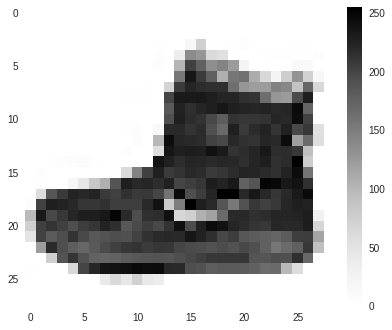

In [9]:
#inspecting image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
 # scale values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

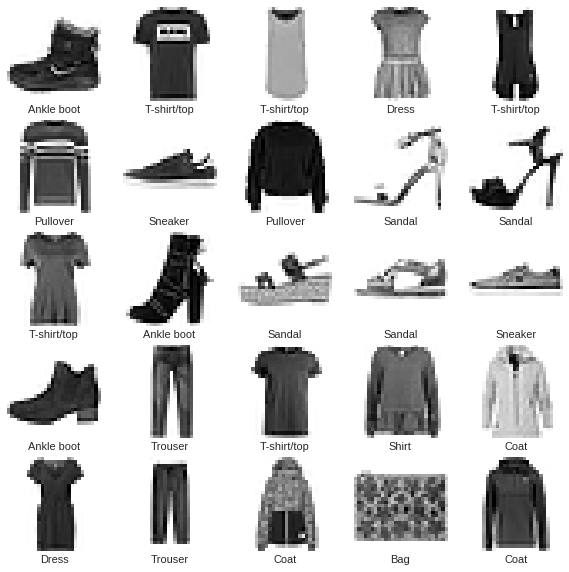

In [11]:
# inspecting th data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# set up keras model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
'''
* Loss function —This measures how accurate the model is during training. 
We want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees 
and its loss function.
* Metrics —Used to monitor the training and testing steps. 
The following example uses accuracy, the fraction of the images that are correctly classified.
'''

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5001 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3759 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3353 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3107 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2913 - acc: 0.8931


In [17]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

# difference in accuracy is because of overfitting
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3468 - acc: 0.8752
Test accuracy: 0.8752


Probability for each label - 9 is the max


In [18]:
# predict
predictions = model.predict(test_images)
predictions[0]

array([1.7164857e-06, 7.5298638e-09, 1.5206197e-07, 1.3280129e-09,
       4.8085036e-07, 2.3233190e-02, 1.1549179e-06, 1.0803865e-02,
       8.6644368e-06, 9.6595073e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])


9

In [0]:
# graph channels
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

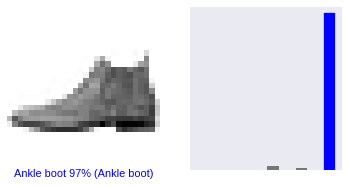

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

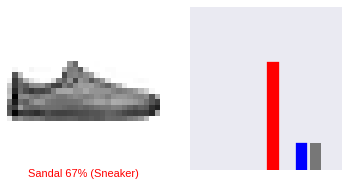

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

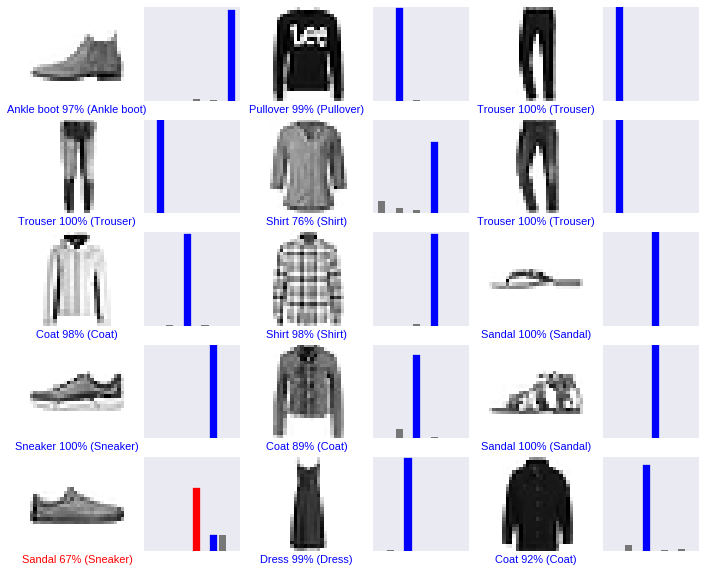

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)